# Optimal pressurefor marketing


In [3]:
import numpy as np
import matplotlib.pyplot as plt

**Incremental sales curve**

The Hill function is one method to helps us understand how incremental sales change with ad frequency, capturing the diminishing returns effect.

$$Hill(F,K,S) =\frac{F^S}{F^S+K^S}$$

**Calculate incremental sales**

$$Inc.sales = \beta * Hill(AdSpend,k,s)$$


**Calculate ROAS**

- ROAS is the ratio of incremental sales to the ad spend.
  $$ROAS = \frac{IncrementalSales}{AdSpend}$$


**Calculate Marginal ROAS**

Marginal ROAS is the additional return on the next dollar spent.
$$Marginal ROAS
=\frac{d(Incremental Sales)}{d(AdSpend)}
=\beta \frac{d(Hill(AdSpend,k,s))}{d(Ad Spend)}
$$
​
**Optimal range**

The optimal range can be found by identifying the interval where 
- the first derivative is high (indicating rapid growth)
  
- The ROAS is maximised  indicating the start of diminishing returns.



**First Derivative (Rapid Growth):**

- The first derivative of the incremental sales curve with respect to advertising spend gives the rate of change of incremental sales.

- A high first derivative indicates that incremental sales are increasing rapidly for each additional unit of ad spend. This suggests a phase where additional spending is highly effective.

​
- Mathematically, if the first derivative  is large, it indicates a steep slope of the incremental sales curve, representing high growth.


**ROAS Maximization (Diminishing Returns)**

- As ad spend continues to increase, the incremental sales start to exhibit diminishing returns due to market saturation or audience fatigue. This leads to a decrease in ROAS.

- The optimal range for ad spend is where ROAS is maximized, indicating that each additional dollar spent is yielding the highest possible return before the diminishing returns set in.

In [4]:
# Define the Hill function for Incremental Sales
def hill_function(F, K, S):
    return   (F**S / (K**S + F**S))

# Define the first derivative of the Hill function
def hill_derivative(F, K, S):
    return ( S * K**S * F**(S-1)) / (K**S + F**S)**2
    

def find_max_roas(x, y_roas):
    max_roas_index = np.argmax(y_roas)
    max_roas_value = y_roas[max_roas_index]
    max_roas_frequency = x[max_roas_index]
    return max_roas_frequency, max_roas_value





In [5]:
# Define parameters for the Hill function
K = 10_000  # Half-maximal effective concentration
S =   4  # Hill coefficient (steepness of the curve)

# Define the x-axis values (Average Weekly HH GRPs)
x = np.linspace(0.1, K*3, 1_500)


In [6]:
beta = 30_000
y_incremental_volume = beta * hill_function(x, K, S)
y_derivative = beta* hill_derivative(x, K, S)




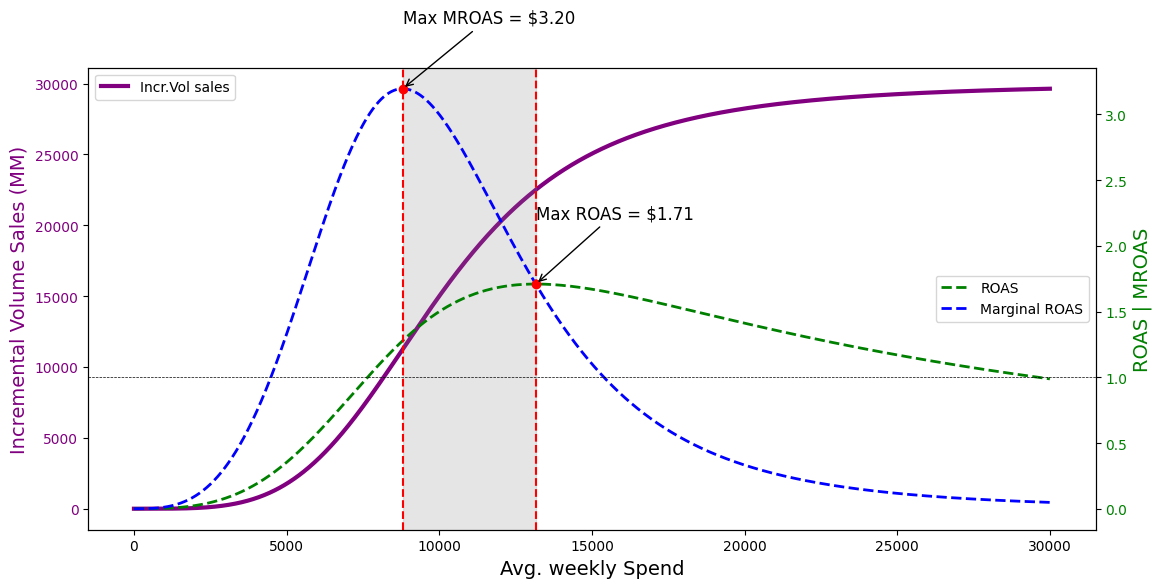

In [7]:
fig, ax1 = plt.subplots(figsize=(13, 6))
# Plot Incremental Volume Sales (dashed line)
ax1.plot(x, y_incremental_volume, linestyle='-',label='Incr.Vol sales', color='purple', linewidth=3)
ax1.set_xlabel('Avg. weekly Spend', fontsize=14)
ax1.set_ylabel('Incremental Volume Sales (MM)', fontsize=14, color='purple')
ax1.tick_params(axis='y', labelcolor='purple')
ax1.legend(loc='upper left')

 # Plot ROAS (solid green line)
cost_per_GRP = 1  # Assume $1 per GRP for simplicity
ad_spend = x * cost_per_GRP
y_roas = y_incremental_volume / ad_spend
y_roas[0] = 0  # Avoid division by zero



max_roas_frequency, max_roas_value = find_max_roas(x, y_roas)

ax2 = ax1.twinx()
ax2.plot(x, y_roas, label='ROAS', linestyle='--',color='green', linewidth=2)
ax2.set_ylabel('ROAS | MROAS', fontsize=14, color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.legend(loc='upper right')


# Plot Marginal ROAS (solid blue line)
y_marginal_roas = beta*hill_derivative(x, K, S) / cost_per_GRP
max_mroas_frequency, max_mroas_value = find_max_roas(x, y_marginal_roas)


ax2.plot(x, y_marginal_roas, linestyle='--', 
         label='Marginal ROAS', 
         color='blue', 
         linewidth=2)
ax2.legend(loc='center right')

# Highlight optimal range
plt.axvspan(max_mroas_frequency, max_roas_frequency, color='grey', alpha=0.2, label='Optimal Range')

# Highlight the maximum ROAS point
ax2.plot(max_roas_frequency, max_roas_value, 'ro')  # Red dot at max ROAS point
ax2.plot(max_mroas_frequency, max_mroas_value, 'ro')  # Red dot at max ROAS point

ax2.annotate(f'Max ROAS = ${max_roas_value:.2f}', 
             xy=(max_roas_frequency, max_roas_value),
             xytext=(max_roas_frequency+ 1 , max_roas_value+0.5 ),
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
            fontsize=12)


ax2.annotate(f'Max MROAS = ${max_mroas_value:.2f}', 
             xy=(max_mroas_frequency, max_mroas_value),
             xytext=(max_mroas_frequency , max_mroas_value + 0.5),
             arrowprops=dict(facecolor='black', arrowstyle='->'), 
            fontsize=12)

ax2.axvline(max_roas_frequency,color='red',linestyle='--')
ax2.axvline(max_mroas_frequency,color='red',linestyle='--',label='max marginal roas')
ax2.axhline(1,color='black',linestyle='--',lw=0.5)

plt.tight_layout()
plt.show()
plt.close()

